# The Battle of Neighborhoods: NY vs San Diego

## LIBRARIES

In [ ]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas import ExcelWriter
from pandas import ExcelFile

import json

import requests
from pandas.io.json import json_normalize

%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from math import sqrt

!pip install folium
import folium

!pip install seaborn
import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim

!pip install shapely
import shapely.wkt

!pip install PyPDF2
import PyPDF2

print('Libraries imported.')

## DATA

### New York

In [2]:
!wget -q -O 'nyu-2451-34572-geojson.json' https://geo.nyu.edu/download/file/nyu-2451-34572-geojson.json

with open('nyu-2451-34572-geojson.json') as json_data:
    ny_data = json.load(json_data)

#define a new variable that includes above data
ny_neighborhoods = ny_data['features']

ny_neighborhoods[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [3]:
#transform the data into a pandas dataframe

#1.define the dataframe columns
ny_column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

#2.dataframe
ny = pd.DataFrame(columns=ny_column_names)

#3.loop through the data and fill the dataframe one row at a time
for data in ny_neighborhoods:
    borough = ny_neighborhood_name = data['properties']['borough']
    ny_neighborhood_name = data['properties']['name']
    
    ny_neighborhood_latlon = data['geometry']['coordinates']
    ny_neighborhood_lat = ny_neighborhood_latlon[1]
    ny_neighborhood_lon = ny_neighborhood_latlon[0]
    
    ny = ny.append({'Borough':borough,
                   'Neighborhood':ny_neighborhood_name,
                   'Latitude':ny_neighborhood_lat,
                   'Longitude':ny_neighborhood_lon}, ignore_index=True)
display(ny.head())

print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny['Borough'].unique()),
        ny.shape[0]
    )
)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


The dataframe has 5 boroughs and 306 neighborhoods.


**Only interested in Manhattan**

In [4]:
manhattan = ny[ny['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan = manhattan[['Neighborhood', 'Latitude', 'Longitude']]
display(manhattan.head())

print('The dataframe has {} neighborhoods.'.format(manhattan.shape[0]))

,Neighborhood,Latitude,Longitude
0,Marble Hill,40.876551,-73.910660
1,Chinatown,40.715618,-73.994279
2,Washington Heights,40.851903,-73.936900
3,Inwood,40.867684,-73.921210
4,Hamilton Heights,40.823604,-73.949688


The dataframe has 40 neighborhoods.


### San Diego

In [5]:
!wget -q -O 'gn-san-diego.geojson' https://github.com/blackmad/neighborhoods/raw/master/gn-san-diego.geojson

with open('gn-san-diego.geojson') as json_data:
    sd_data = json.load(json_data)
    
#define a new variable that includes the above data
sd_neighborhoods = sd_data['features']

sd_neighborhoods[0]

{'type': 'Feature',
 'properties': {'fclass': 'P',
  'name': 'Qualcomm',
  'countryCode': 'US',
  'geonameid': None,
  'created_at': '2013-02-16T03:11:02.653Z',
  'cartodb_id': 1,
  'updated_at': '2013-02-16T03:11:19.974Z',
  'fcode': 'PPLX',
  'lat': 32.783321677093554,
  'parents': '5391811',
  'adminCode4': '',
  'lng': -117.11973779002166,
  'adminCode1': 'CA',
  'adminCode2': '073',
  'adminCode3': ''},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-117.1145, 32.7862],
     [-117.114503, 32.786187],
     [-117.114506, 32.786173],
     [-117.114509, 32.78616],
     [-117.114512, 32.786146],
     [-117.114515, 32.786133],
     [-117.114518, 32.786119],
     [-117.11452, 32.786106],
     [-117.114523, 32.786092],
     [-117.114526, 32.786079],
     [-117.114528, 32.786065],
     [-117.11453, 32.786051],
     [-117.114533, 32.786038],
     [-117.114535, 32.786024],
     [-117.114537, 32.786011],
     [-117.11454, 32.785997],
     [-117.114542, 32.785983],
     [-117.11454

In [6]:
#transform the data into a pandas dataframe

#1.define the dataframe columns
sd_column_names = ['Neighborhood', 'Latitude', 'Longitude']

#2.dataframe
sd = pd.DataFrame(columns=sd_column_names)

#3.loop through the data and fill the dataframe one row at a time
for data in sd_neighborhoods:
    sd_neighborhood_name = data['properties']['name']
    
    sd_neighborhood_lat = data['properties']['lat']
    sd_neighborhood_lon = data['properties']['lng']
    
    sd = sd.append({'Neighborhood':sd_neighborhood_name,
                   'Latitude':sd_neighborhood_lat,
                   'Longitude':sd_neighborhood_lon}, ignore_index=True)
display(sd.head())

print('The dataframe has {} neighborhoods'.format(sd.shape[0]))

,Neighborhood,Latitude,Longitude
0,Qualcomm,32.783322,-117.119738
1,Egger Highlands,32.587312,-117.100488
2,Old Town,32.754602,-117.195528
3,Morena,32.769888,-117.193218
4,Midtown,32.739864,-117.175020


The dataframe has 124 neighborhoods


## MAP

In [7]:
#get the geographical cooridnates of Manhattan
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude
print('The geographical coordinate of Manhattan are {}, {}.'.format(ny_latitude, ny_longitude))


#get the geographical cooridnates of San Diego
address = 'San Diego, CA'

geolocator = Nominatim(user_agent="sd_explorer")
location = geolocator.geocode(address)
sd_latitude = location.latitude
sd_longitude = location.longitude

print('The geographical coordinate of San Diego are {}, {}.'.format(sd_latitude, sd_longitude))

The geographical coordinate of Manhattan are 40.7896239, -73.9598939.
The geographical coordinate of San Diego are 32.7174209, -117.1627714.


In [45]:
#Visualize - MAP

#create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

#add markers to map
for lat, lng, label in zip(manhattan['Latitude'], manhattan['Longitude'], 
                           manhattan['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
display(map_manhattan)

#create mp of San Diego using latitude and longitude values
map_sd = folium.Map(location=[sd_latitude, sd_longitude], zoom_start=10)

#add markers to map
for lat, lng, neighborhood in zip(sd['Latitude'], sd['Longitude'],
                                  sd['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sd)

display(map_sd)

## EXPLORE NEIGHBORHOODS
by utilizing the Foursquare API:

1. define credentials
2. create a function to repeat the same process to all the neighborhoods in San Diego
3. create the API request URL
4. make the GET request
5. return only relevant information for each nearby venue

In [9]:
# 1.Define Foursquare Credentials and Version

CLIENT_ID = 'XT0YNJESUHUMDOGSL5P1MMLELXBVIVMULYDPTPXKRYS45SL2' #Foursquare ID
CLIENT_SECRET = 'LOSOF50ZNJFHFPN5K1IQ0TYS412YOFIZCOOHJMTIQHASMIZY'#Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [10]:
# 2.Create a function to repeat the same process to all the neighborhoods in San Diego

def getNearbyVenues(names, latitudes, longitudes):
    radius = 500
    LIMIT = 100
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        #3. Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #4. Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #5. Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [11]:
#manhattan
manhattan_venues = getNearbyVenues(names = manhattan['Neighborhood'],
                                   latitudes = manhattan['Latitude'],
                                   longitudes = manhattan['Longitude']
                                  )

#San Diego
sd_venues = getNearbyVenues(names = sd['Neighborhood'],
                           latitudes = sd['Latitude'],
                           longitudes = sd['Longitude']
                           )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards
Qualcomm
Egger Highlands
Old Town
Morena
Midtown
Fairmont Village
Lincoln Park
Grantville
Del Cerro
San Pasqual
Ocean Beach
Mission Bay Park
La Jolla
Torrey Pines
Bay Ho
Linda Vista
Castle
Valencia Park
College East
Clairemont Mesa East
Tierrasanta
Scripps Ranch
Rancho Encantada
Mission Beach
Miramar Ranch North
Mission Bay
North City
Loma Portal
Gaslamp
Hillcrest
North Park
Southcrest
Teralta West
Mt Hope
Teralta East
Ridgeview/Webster
Paradise Hills
Bay Terraces
Sorrento Valley

In [12]:
print("Manhattan venues:", manhattan_venues.shape)
print("San Diego venues:", sd_venues.shape)

#from IPython.display import display_html
#def display_side_by_side(*args):
    #html_str=''
    #for df in args:
        #html_str+=df.to_html()
    #display_html(html_str.replace('table','table style="display:inline"'),raw=True)
#display_side_by_side(df1,df2,df1)

display(manhattan_venues.head(), sd_venues.head())

Manhattan venues: (2996, 7)
San Diego venues: (1927, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Qualcomm,32.783322,-117.119738,SDCCU Stadium,32.783035,-117.119493,Football Stadium
1,Qualcomm,32.783322,-117.119738,Qualcomm Stadium Swap Meet,32.784975,-117.121750,Flea Market
2,Qualcomm,32.783322,-117.119738,Murphy's Sports Bar,32.783613,-117.120861,Sports Bar
3,Qualcomm,32.783322,-117.119738,Drag Racing at The Q,32.780948,-117.124208,Racetrack
4,Egger Highlands,32.587312,-117.100488,Jalisco Cafe,32.583549,-117.097720,Mexican Restaurant


In [13]:
table1 = manhattan_venues.groupby('Neighborhood').count().reset_index()
table2 = sd_venues.groupby('Neighborhood').count().reset_index()

display(table1.head())
print('Manhattan - there are {} unique categories.'.format(len(manhattan_venues['Venue Category'].unique())))

display(table2.head())
print('San Diego - there are {} unique categories.'.format(len(sd_venues['Venue Category'].unique())))

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Battery Park City,59,59,59,59,59,59
1,Carnegie Hill,85,85,85,85,85,85
2,Central Harlem,45,45,45,45,45,45
3,Chelsea,97,97,97,97,97,97
4,Chinatown,100,100,100,100,100,100


Manhattan - there are 329 unique categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams North,1,1,1,1,1,1
1,Allied Gardens,5,5,5,5,5,5
2,Alta Vista,3,3,3,3,3,3
3,Azalea/Hollywood Park,2,2,2,2,2,2
4,Balboa Park,46,46,46,46,46,46


San Diego - there are 280 unique categories.


## ANALYZE EACH NEIGHBORHOOD

In [14]:
#one hot encoding - representation of categorical variables as binary vectors
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
sd_onehot = pd.get_dummies(sd_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighborhood column to the first column
manhattan_onehot.insert(loc=0, column='Neighborhood', value=manhattan_venues['Neighborhood'])

sd_onehot.drop(['Neighborhood'], axis=1, inplace=True)
sd_onehot.insert(loc=0, column='Neighborhood', value=sd_venues['Neighborhood'])

print("Manhattan:", manhattan_onehot.shape)
print("San Diego:", sd_onehot.shape)
display(manhattan_onehot.head(), sd_onehot.head())

Manhattan: (2996, 330)
San Diego: (1927, 280)


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Pla

,Neighborhood,ATM,Accessories Store,Advertising Agency,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cruise,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Roller Rink,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Trail,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wing

In [15]:
#rows by neighborhood and the mean of the frequency of occurrence of each category
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
sd_grouped = sd_onehot.groupby('Neighborhood').mean().reset_index()

display(manhattan_grouped.head()) 
print(manhattan_grouped.shape)
display(sd_grouped.head())
print(sd_grouped.shape)

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Pla

(40, 330)


,Neighborhood,ATM,Accessories Store,Advertising Agency,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cruise,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Roller Rink,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Trail,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wing

(117, 280)


In [16]:
#print each neighborhood in manhattan & san diego along with the top 5 most common venues
num_top_venues = 5

#manhattan
for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    m_temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    m_temp.columns = ['venue', 'freq']
    m_temp = m_temp.iloc[1:]
    m_temp['freq'] = m_temp['freq'].astype(float)
    m_temp = m_temp.round({'freq':2})
    print(m_temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
#san diego
for hood in sd_grouped['Neighborhood']:
    print("----"+hood+"----")
    sd_temp = sd_grouped[sd_grouped['Neighborhood'] == hood].T.reset_index()
    sd_temp.columns = ['venue', 'freq']
    sd_temp = sd_temp.iloc[1:]
    sd_temp['freq'] = sd_temp['freq'].astype(float)
    sd_temp = sd_temp.round({'freq':2})
    print(sd_temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
    
#put the above data into a pandas dataframe

#1.write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


#2.create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#3.create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
#4_manhattan create a new dataframe for Manhattan
m_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
m_neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    m_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)
        
#4_sandiego create a new dataframe for San Diego
sd_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
sd_neighborhoods_venues_sorted['Neighborhood'] = sd_grouped['Neighborhood']

for ind in np.arange(sd_grouped.shape[0]):
    sd_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sd_grouped.iloc[ind, :], num_top_venues)

#5. display
display(m_neighborhoods_venues_sorted)
display(sd_neighborhoods_venues_sorted)

----Battery Park City----
           venue  freq
0           Park  0.10
1          Hotel  0.07
2  Memorial Site  0.05
3  Boat or Ferry  0.05
4            Gym  0.05


----Carnegie Hill----
           venue  freq
0    Coffee Shop  0.08
1    Yoga Studio  0.04
2      Bookstore  0.04
3    Pizza Place  0.04
4  Grocery Store  0.04


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.04
2  American Restaurant  0.04
3   Seafood Restaurant  0.04
4   Chinese Restaurant  0.04


----Chelsea----
                venue  freq
0         Art Gallery  0.16
1         Coffee Shop  0.06
2      Ice Cream Shop  0.03
3  Italian Restaurant  0.03
4           Juice Bar  0.02


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1               Bakery  0.04
2         Cocktail Bar  0.04
3                  Spa  0.03
4  American Restaurant  0.03


----Civic Center----
               venue  freq
0        Coffee Shop  0.06
1                S

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Boat or Ferry,Memorial Site,Shopping Mall,Food Court,Beer Garden,Playground,Plaza
1,Carnegie Hill,Coffee Shop,Yoga Studio,Wine Shop,Pizza Place,Japanese Restaurant,Gym / Fitness Center,Gym,Grocery Store,Café,Bookstore
2,Central Harlem,African Restaurant,Chinese Restaurant,French Restaurant,Cosmetics Shop,Seafood Restaurant,Art Gallery,American Restaurant,Bar,Bookstore,Market
3,Chelsea,Art Gallery,Coffee Shop,Italian Restaurant,Ice Cream Shop,Hotel,Market,Café,Cycle Studio,Cupcake Shop,Seafood Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Optical Shop,Salon / Barbershop,Coffee Shop,Spa,American Restaurant,Asian Restaurant,Hotel
5,Civic Center,Coffee Shop,Spa,Hotel,French Restaurant,Park,Yoga Studio,American Restaurant,Sushi Restaurant,Gym / Fitness Center,Cocktail Bar
6,Clinton,Theater,Coffee Shop,Gym / Fitness Center,Wine Shop,Hotel,Gym,Sandwich Place,Cocktail Bar,American Restaurant,Spa
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Latin American Restaurant,Deli / Bodega,Mobile Phone Shop,Seafood Restaurant,Taco Place,Street Art,Steakhouse
8,East Village,Pizza Place,Cocktail Bar,Wine Bar,Coffee Shop,Dessert Shop,Vietnamese Restaurant,Japanese Restaurant,Ramen Restaurant,Juice Bar,Gourmet Shop
9,Financial District,Coffee Shop,Hotel,American Restaurant,Pizza Place,Salad Place,Café,Cocktail Bar,Gym,Gym / Fitness Center,Park


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams North,Park,Zoo Exhibit,Filipino Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop
1,Allied Gardens,Pool,Park,Recreation Center,Print Shop,Currency Exchange,Dance Studio,Flower Shop,Flea Market,Fishing Spot,Fish Market
2,Alta Vista,Child Care Service,Gym,Zoo Exhibit,Eastern European Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant
3,Azalea/Hollywood Park,Restaurant,Park,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Zoo Exhibit
4,Balboa Park,Zoo Exhibit,Art Museum,Garden,Gift Shop,Park,Performing Arts Venue,Coffee Shop,History Museum,Pharmacy,Theater
5,Barrio Logan,Fast Food Restaurant,Mexican Restaurant,Coffee Shop,BBQ Joint,Pizza Place,Chinese Restaurant,Sandwich Place,Filipino Restaurant,Southern / Soul Food Restaurant,Boat or Ferry
6,Bay Ho,Pool,Speakeasy,Mexican Restaurant,Pizza Place,Liquor Store,Fast Food Restaurant,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market
7,Bay Park,Hotel,Coffee Shop,Convenience Store,Gas Station,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
8,Bay Terraces,Taco Place,Sandwich Place,Pizza Place,Liquor Store,Laundromat,Farmers Market,Event Space,Exhibit,Eye Doctor,Falafel Restaurant
9,Birdland,Gas Station,Convenience Store,Sandwich Place,Doctor's Office,Video Store,Burrito Place,Zoo Exhibit,Farmers Market,Exhibit,Eye Doctor


**Currently live in Chelsea, Manhattan. Analyze Chelsea Neighborhood**

,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Boutique,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Coffee Shop,Cosmetics Shop,Cupcake Shop,Cycle Studio,Electronics Store,Fish Market,Flea Market,French Restaurant,General Entertainment,Gift Shop,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Market,Mediterranean Restaurant,Movie Theater,Nightclub,Noodle House,Office,Park,Photography Studio,Physical Therapist,Pizza Place,Plaza,Pool,Ramen Restaurant,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Speakeasy,Supermarket,Taco Place,Tapas Restaurant,Theater,Wine Bar,Wine Shop,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Chelsea,2.1,16.5,1.0,1.0,1.0,1.0,1.0,2.1,2.1,1.0,1.0,1.0,1.0,6.2,1.0,2.1,2.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.1,3.1,1.0,1.0,3.1,1.0,2.1,2.1,1.0,1.0,1.0,1.0,1.0,2.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.1,1.0,1.0,1.0,1.0,1.0,2.1,1.0,1.0,1.0


Neighborhood        Chelsea
Art Gallery            16.5
Coffee Shop             6.2
Italian Restaurant      3.1
Ice Cream Shop          3.1
Theater                 2.1
Seafood Restaurant      2.1
Park                    2.1
Market                  2.1
Juice Bar               2.1
Hotel                   2.1


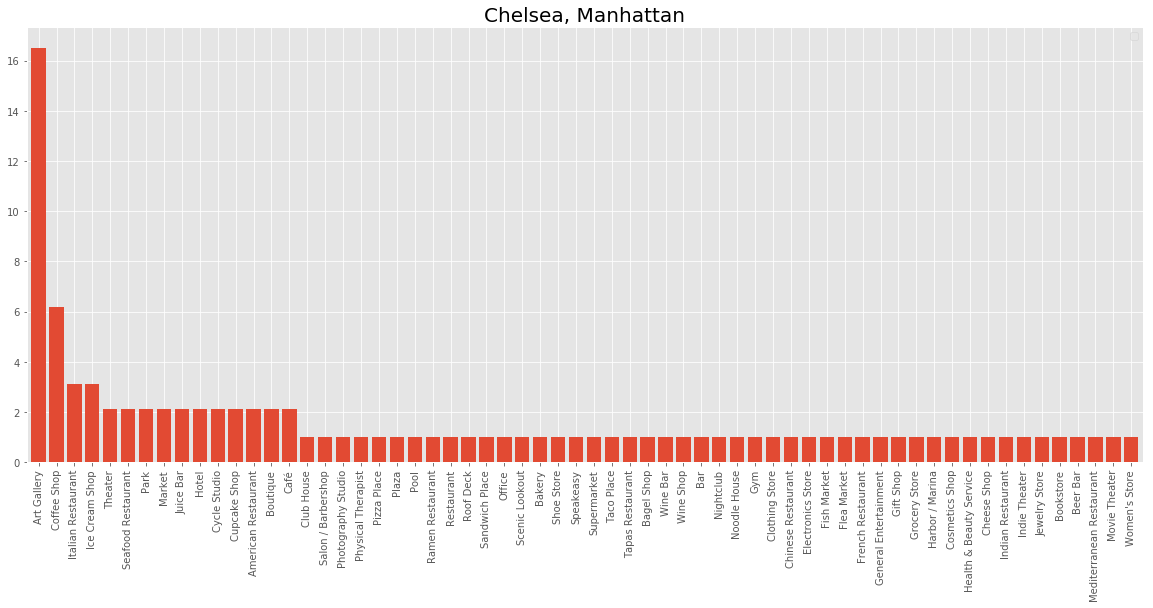

In [17]:
#Chlsea data
chelsea = manhattan_grouped.loc[manhattan_grouped['Neighborhood'] == 'Chelsea']

#remove every venue categories with '0'
chelsea_tr = chelsea.transpose()
chelsea_tr = chelsea_tr.drop(chelsea_tr[chelsea_tr[3] == 0].index)

#transpose back
chelsea_df = chelsea_tr.transpose()

#set Nieghborhood as index
chelsea_df.set_index('Neighborhood', inplace=True)

#check dtpye of the dataframes
#print(chelsea_df.dtypes)

#covert object dtypes to int for charts
chelsea_df = chelsea_df.astype('float')

#multiply by 100 to the numbers big enough
chelsea_df = (100*chelsea_df).round(1)
display(chelsea_df)



#visualization
chelsea_transp = chelsea_df.transpose()
chelsea_transp = chelsea_transp.sort_values(by='Chelsea', ascending=False)
print(chelsea_transp.head(10))

ax_c = chelsea_transp.plot(kind='bar', figsize=(20,8), width=0.8)
ax_c.set_title("Chelsea, Manhattan", fontsize=20)
ax_c.legend([])
plt.yticks()
plt.xticks()
plt.show()

**Find similar neighborhoods in San Diego to Chelsea**

In [18]:
#Get differenct between each of the San Diego neighborhoods and Chelsea, Manhattan
sd_grouped_indexed = sd_grouped.set_index([pd.Index(range(0,len(sd_grouped))), 'Neighborhood'])
manhattan_grouped_indexed = manhattan_grouped.set_index([pd.Index(range(0,len(manhattan_grouped))),'Neighborhood'])
##<- creating a multiIndex using an Index and a column

sd_grouped_compared_to_chelsea = sd_grouped_indexed - manhattan_grouped_indexed.iloc[3]
sd_grouped_compared_to_chelsea #This formula took into the account that some columns in San Diego dataframe do not exist in Manhattan/Chelsea dataframe.
#It still included all the columns in the San Diego dataframe, but for the columns that don't co-exist in both dataframes, values were 'NaN'

#sqaure everything to unify -&+ numbers
sd_grouped_compared_to_chelsea = sd_grouped_compared_to_chelsea.pow(2)
sd_grouped_compared_to_chelsea.head()

#square root everything & sort ascending order
sd_grouped_compared_to_chelsea_sum = sd_grouped_compared_to_chelsea.sum(axis=1)
sd_grouped_distance = np.sqrt(sd_grouped_compared_to_chelsea_sum).sort_values(ascending=True)

sd_grouped_distance.head(10)

     Neighborhood    
105  Sunset Cliffs       0.203853
86   Rancho Encantada    0.203853
74   Ocean Crest         0.203853
37   Gaslamp             0.204930
24   Core-Columbia       0.210738
71   North Park          0.212948
41   Harborview          0.215801
53   Little Italy        0.220545
43   Horton Plaza        0.222294
42   Hillcrest           0.225538
dtype: float64

In [19]:
#San Diego vs Chelsea - venue frequency & common

#Chelsea
#1.frequency 
chelsea_freq = manhattan_grouped.iloc[[3]]
display(chelsea_freq)

#2.common
chelsea_common = m_neighborhoods_venues_sorted.iloc[[3]] #chelsea dataframe we created earlier
display(chelsea_common)

#San Diego
rows = [35,115,104,93,85,73,109,70,23,51]
#1.frequency
sd_top10_freq = sd_grouped.iloc[rows]
display(sd_top10_freq)

#2.common
sd_top10_common = sd_neighborhoods_venues_sorted.iloc[rows]
display(sd_top10_common)

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Field,Soup Pla

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Chelsea,Art Gallery,Coffee Shop,Italian Restaurant,Ice Cream Shop,Hotel,Market,Café,Cycle Studio,Cupcake Shop,Seafood Restaurant


,Neighborhood,ATM,Accessories Store,Advertising Agency,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Bar,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cruise,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Laundromat,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pop-Up Shop,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Roller Rink,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Trail,Train Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wing

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Fairmont Village,Taco Place,Mexican Restaurant,Grocery Store,Bank,Zoo Exhibit,Fast Food Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant
115,University Heights,Pizza Place,Coffee Shop,Bar,Theater,Spa,Brewery,Breakfast Spot,New American Restaurant,Sandwich Place,Ethiopian Restaurant
104,Stockton,Motel,Marijuana Dispensary,Other Repair Shop,Mexican Restaurant,Liquor Store,Intersection,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant
93,San Carlos,Playground,Home Service,Diner,Zoo Exhibit,Filipino Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market
85,Rancho Bernardo,Sports Bar,Pharmacy,Tennis Court,Bakery,Coffee Shop,Thai Restaurant,Pizza Place,American Restaurant,Spa,Farmers Market
73,Ocean Beach,Brewery,Café,Mexican Restaurant,Bar,Liquor Store,Park,Breakfast Spot,Pizza Place,ATM,Marijuana Dispensary
109,Teralta West,Mexican Restaurant,Pizza Place,Food Truck,Taco Place,Vietnamese Restaurant,Liquor Store,Pharmacy,Sandwich Place,Dive Bar,Fast Food Restaurant
70,North Clairemont,Mobile Phone Shop,Dance Studio,Middle Eastern Restaurant,Mexican Restaurant,Recreation Center,Chinese Restaurant,Liquor Store,Filipino Restaurant,Eye Doctor,Falafel Restaurant
23,College West,Baseball Stadium,Pool,American Restaurant,Tennis Court,Restaurant,Coffee Shop,Farmers Market,Event Space,Exhibit,Eye Doctor
51,Lincoln Park,Theater,Cosmetics Shop,Mexican Restaurant,Health & Beauty Service,Coffee Shop,Zoo Exhibit,Filipino Restaurant,Exhibit,Eye Doctor,Falafel Restaurant


**Venues I would like to have in my new neighborhood**

In [20]:
#What does Chelsea have?
print("Chelsea has these Venues:", list(chelsea_df.columns))

print('\n')

#What does Chelsea not have?
#1.display every venue categories with '0' - chelsea does not have these venues
chelsea_rev_tr = chelsea_freq.transpose() #chelsea dataframe from earlier codes
chelsea_rev_tr = chelsea_rev_tr.loc[chelsea_rev_tr[3] == 0]
chelsea_rev_df = chelsea_rev_tr.transpose()
#2.transpose back
print("Venues that Chelsea does not have:", list(chelsea_rev_df.columns))

print('\n') #new line

#What does San Diego have that Manhattan does not?
venues_difference = sd_grouped.columns.difference(manhattan_grouped.columns)
print("Venues that San Diego has but Manhattan doesn't:",venues_difference)

Chelsea has these Venues: ['American Restaurant', 'Art Gallery', 'Bagel Shop', 'Bakery', 'Bar', 'Beer Bar', 'Bookstore', 'Boutique', 'Café', 'Cheese Shop', 'Chinese Restaurant', 'Clothing Store', 'Club House', 'Coffee Shop', 'Cosmetics Shop', 'Cupcake Shop', 'Cycle Studio', 'Electronics Store', 'Fish Market', 'Flea Market', 'French Restaurant', 'General Entertainment', 'Gift Shop', 'Grocery Store', 'Gym', 'Harbor / Marina', 'Health & Beauty Service', 'Hotel', 'Ice Cream Shop', 'Indian Restaurant', 'Indie Theater', 'Italian Restaurant', 'Jewelry Store', 'Juice Bar', 'Market', 'Mediterranean Restaurant', 'Movie Theater', 'Nightclub', 'Noodle House', 'Office', 'Park', 'Photography Studio', 'Physical Therapist', 'Pizza Place', 'Plaza', 'Pool', 'Ramen Restaurant', 'Restaurant', 'Roof Deck', 'Salon / Barbershop', 'Sandwich Place', 'Scenic Lookout', 'Seafood Restaurant', 'Shoe Store', 'Speakeasy', 'Supermarket', 'Taco Place', 'Tapas Restaurant', 'Theater', 'Wine Bar', 'Wine Shop', "Women's St

In [21]:
#convert chelsea_df columns to a list of str
#1.get arrays
chelsea_col_names = chelsea_df.columns.get_values()
#2.convert the array to a list
chelsea_col_names = chelsea_col_names.tolist()

#add the venues that I want, which Chelsea does not have to the above list
#1.list of new venues I want to include on top
venues_tobeincluded = ['Art Museum', 'Bank', 'Climbing Gym', 'Cocktail Bar', 'Convenience Store',
               'Drugstore', 'English Restaurant', 'Flower Shop', 'Frozen Yogurt Shop',
               'Gas Station', 'Gym / Fitness Center', 'Nail Salon', 'Pet Service', 
               'Tiki Bar', 'Automotive Shop', 'Pharmacy']
#2.add new venue categories to existing venue categories
updated_list = chelsea_col_names + venues_tobeincluded #don't use .append in this case, because you're creating a completely new list
print('Updated venue list:', updated_list)

#df_i_want = sddata[abovelist]
#1.set 'Neighborhood' as its index & transpose sd_grouped 
sd_grouped_indexed = sd_onehot.groupby('Neighborhood').sum()
sd_grouped_tr = sd_grouped_indexed.transpose()
#2.get dataframe that includes all the venues you want
df_iwant = sd_grouped_tr.reindex(updated_list)
#3.transpose back
df_iwant = df_iwant.transpose()
#4.fill Nan values to 0
df_iwant = df_iwant.fillna(0)
df_iwant

Updated venue list: ['American Restaurant', 'Art Gallery', 'Bagel Shop', 'Bakery', 'Bar', 'Beer Bar', 'Bookstore', 'Boutique', 'Café', 'Cheese Shop', 'Chinese Restaurant', 'Clothing Store', 'Club House', 'Coffee Shop', 'Cosmetics Shop', 'Cupcake Shop', 'Cycle Studio', 'Electronics Store', 'Fish Market', 'Flea Market', 'French Restaurant', 'General Entertainment', 'Gift Shop', 'Grocery Store', 'Gym', 'Harbor / Marina', 'Health & Beauty Service', 'Hotel', 'Ice Cream Shop', 'Indian Restaurant', 'Indie Theater', 'Italian Restaurant', 'Jewelry Store', 'Juice Bar', 'Market', 'Mediterranean Restaurant', 'Movie Theater', 'Nightclub', 'Noodle House', 'Office', 'Park', 'Photography Studio', 'Physical Therapist', 'Pizza Place', 'Plaza', 'Pool', 'Ramen Restaurant', 'Restaurant', 'Roof Deck', 'Salon / Barbershop', 'Sandwich Place', 'Scenic Lookout', 'Seafood Restaurant', 'Shoe Store', 'Speakeasy', 'Supermarket', 'Taco Place', 'Tapas Restaurant', 'Theater', 'Wine Bar', 'Wine Shop', "Women's Store", 

,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Boutique,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Coffee Shop,Cosmetics Shop,Cupcake Shop,Cycle Studio,Electronics Store,Fish Market,Flea Market,French Restaurant,General Entertainment,Gift Shop,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Market,Mediterranean Restaurant,Movie Theater,Nightclub,Noodle House,Office,Park,Photography Studio,Physical Therapist,Pizza Place,Plaza,Pool,Ramen Restaurant,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Speakeasy,Supermarket,Taco Place,Tapas Restaurant,Theater,Wine Bar,Wine Shop,Women's Store,Art Museum,Bank,Climbing Gym,Cocktail Bar,Convenience Store,Drugstore,English Restaurant,Flower Shop,Frozen Yogurt Shop,Gas Station,Gym / Fitness Center,Nail Salon,Pet Service,Tiki Bar,Automotive Shop,Pharmacy
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adams North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allied Gardens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alta Vista,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Azalea/Hollywood Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Balboa Park,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Barrio Logan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bay Ho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bay Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bay Terraces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [22]:
#find the number of non 0 values for each neighborhood (number of venue categories of my preference)
neighborhood_iwant = df_iwant[df_iwant != 0.0].count(axis=1).sort_values(ascending=False)
print(neighborhood_iwant.head(19))

print('\n')

print(sd_grouped_distance.head(10)) #neighborhoods that are similar to Chelsea

#neighborhoods that are in both lists
#1.I just want certain number of results from both lists
neighborhood_iwant_19 = pd.DataFrame(neighborhood_iwant.head(19))
sd_grouped_distance_10 = pd.DataFrame(sd_grouped_distance.head(10))

print('\n')

in_bothlist = neighborhood_iwant_19.merge(sd_grouped_distance_10, on='Neighborhood', how='inner')
print("Neighborhoods that are included in both lists:", in_bothlist)

Neighborhood
Hillcrest          29
Gaslamp            27
Harborview         25
Core-Columbia      24
Little Italy       23
Horton Plaza       22
Ocean Beach        21
Pacific Beach      20
North Park         19
Grantville         19
Marina             18
Old Town           16
East Village       13
Petco Park         12
Park West          11
Carmel Mountain    11
South Park         10
Balboa Park        10
Grant Hill          9
dtype: int64


     Neighborhood    
105  Sunset Cliffs       0.203853
86   Rancho Encantada    0.203853
74   Ocean Crest         0.203853
37   Gaslamp             0.204930
24   Core-Columbia       0.210738
71   North Park          0.212948
41   Harborview          0.215801
53   Little Italy        0.220545
43   Horton Plaza        0.222294
42   Hillcrest           0.225538
dtype: float64


Neighborhoods that are included in both lists:                0_x       0_y
Neighborhood                
Hillcrest       29  0.225538
Gaslamp         27  0.204930
Harborview  

**Analyze each neighborhood above**

In [42]:
neighborhoods_iwant_final = ['Hillcrest', 'Gaslamp', 'Harborview', 'Core-Columbia', 'Little Italy', 'Horton Plaza', 'North Park']

#number of venues
neighborhood_iwant_final_detailed = df_iwant.loc[neighborhoods_iwant_final, :]
neighborhood_iwant_final_detailed = neighborhood_iwant_final_detailed.reset_index()
display(neighborhood_iwant_final_detailed)

#common venues
neighborhood_iwant_final_detailed_common = sd_top10_common.loc[[35,51,23,70]]
display(neighborhood_iwant_final_detailed_common)

#visualize map
#1.latitude & Logitude of each neighborhoods
neighborhood_iwant_merged = sd.set_index("Neighborhood")
neighborhood_iwant_merged = neighborhood_iwant_merged.loc[neighborhoods_iwant_final] #initial/original data in the beginning that contains neighborhoods, latitudes and longitudes.
neighborhood_iwant_merged = neighborhood_iwant_merged.reset_index()
display(neighborhood_iwant_merged)

print('\n')

#2.create map
map_neigh_iwant = folium.Map(location=[sd_latitude, sd_longitude], zoom_start=12) #san diego latitude & longitude from earlier on
#3.add markers to map
for niwant_lat, niwant_lng, niwant_neighborhood in zip(neighborhood_iwant_merged['Latitude'],
                                                      neighborhood_iwant_merged['Longitude'],
                                                      neighborhood_iwant_merged['Neighborhood']):
    label = '{}'.format(niwant_neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [niwant_lat, niwant_lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_neigh_iwant)
    
print("Neighborhoods that match my preference:")
display(map_neigh_iwant)

,Neighborhood,American Restaurant,Art Gallery,Bagel Shop,Bakery,Bar,Beer Bar,Bookstore,Boutique,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Coffee Shop,Cosmetics Shop,Cupcake Shop,Cycle Studio,Electronics Store,Fish Market,Flea Market,French Restaurant,General Entertainment,Gift Shop,Grocery Store,Gym,Harbor / Marina,Health & Beauty Service,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Market,Mediterranean Restaurant,Movie Theater,Nightclub,Noodle House,Office,Park,Photography Studio,Physical Therapist,Pizza Place,Plaza,Pool,Ramen Restaurant,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Speakeasy,Supermarket,Taco Place,Tapas Restaurant,Theater,Wine Bar,Wine Shop,Women's Store,Art Museum,Bank,Climbing Gym,Cocktail Bar,Convenience Store,Drugstore,English Restaurant,Flower Shop,Frozen Yogurt Shop,Gas Station,Gym / Fitness Center,Nail Salon,Pet Service,Tiki Bar,Automotive Shop,Pharmacy
0,Hillcrest,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,3.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0
1,Gaslamp,3.0,1.0,0.0,3.0,2.0,0.0,0.0,2.0,5.0,0.0,0.0,3.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Harborview,4.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Core-Columbia,3.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Little Italy,4.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,5.0,2.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Horton Plaza,4.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,4.0,0.0,0.0,2.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,North Park,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Fairmont Village,Taco Place,Mexican Restaurant,Grocery Store,Bank,Zoo Exhibit,Fast Food Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant
51,Lincoln Park,Theater,Cosmetics Shop,Mexican Restaurant,Health & Beauty Service,Coffee Shop,Zoo Exhibit,Filipino Restaurant,Exhibit,Eye Doctor,Falafel Restaurant
23,College West,Baseball Stadium,Pool,American Restaurant,Tennis Court,Restaurant,Coffee Shop,Farmers Market,Event Space,Exhibit,Eye Doctor
70,North Clairemont,Mobile Phone Shop,Dance Studio,Middle Eastern Restaurant,Mexican Restaurant,Recreation Center,Chinese Restaurant,Liquor Store,Filipino Restaurant,Eye Doctor,Falafel Restaurant


,Neighborhood,Latitude,Longitude
0,Hillcrest,32.748324,-117.160321
1,Gaslamp,32.711518,-117.160128
2,Harborview,32.724925,-117.172413
3,Core-Columbia,32.717211,-117.162952
4,Little Italy,32.724606,-117.168006
5,Horton Plaza,32.714130,-117.163787
6,North Park,32.745051,-117.128897




Neighborhoods that match my preference:


## CLUSTER NEIGHBORHOODS
Run k_means to cluster the neighborhoods

In [25]:
#set number of clusters
k = 80

#manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
sd_grouped_clustering = sd_grouped.drop('Neighborhood', 1)

#run k-menas clustering
#Kmeans_m = KMeans(n_clusters=k, random_state=0).fit(manhattan_grouped_clustering)
Kmeans_sd = KMeans(n_clusters=k, random_state=0).fit(sd_grouped_clustering)

#check cluster labels generated for each row in the df
#print(Kmeans_m.labels_[0:10])
print(Kmeans_sd.labels_[0:10])

[ 2 36 15 16  1  1 64 51 69 60]


In [26]:
#create a new df that includes the cluster for San Diego
sd_neighborhoods_venues_sorted.insert(0, 'Cluster labels', Kmeans_sd.labels_)
sd_merged = sd
sd_merged = sd_merged.join(sd_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='right')
#***how='right' : 'neighbourhoods_venues_sorted' (incl. 'Cluster labels' column) are filled with NaN (you can scroll the resulting dataframe to see it yourself), 
#which converts 'Cluster labels' column into FLOAT for some reason (therefore, don't even try to fix it with astype() casting -- it won't work because the column contains NaN values ). 
#This happens because in the method JOIN() the default parameter of how is 'left'. If you simply change it into 'right', it will fix everything as the extra rows from'toronto_merged' dataframe will be simply ignored upon merging.
sd_merged

,Neighborhood,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Qualcomm,32.783322,-117.119738,48,Sports Bar,Racetrack,Football Stadium,Flea Market,Fast Food Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market
1,Egger Highlands,32.587312,-117.100488,73,Mexican Restaurant,Fast Food Restaurant,Auto Workshop,Smoke Shop,Liquor Store,Tattoo Parlor,Juice Bar,Sandwich Place,Wings Joint,Pizza Place
2,Old Town,32.754602,-117.195528,14,Mexican Restaurant,History Museum,Hotel,Gift Shop,Hobby Shop,Tea Room,Taco Place,Café,Bar,Dessert Shop
3,Morena,32.769888,-117.193218,72,Coffee Shop,Café,Bakery,Moving Target,Brewery,Sandwich Place,Bridal Shop,Pizza Place,Discount Store,Distillery
4,Midtown,32.739864,-117.175020,58,Rental Car Location,Motorcycle Shop,Lounge,Intersection,Pet Service,Garden,Gas Station,Accessories Store,Whisky Bar,Pub
5,Fairmont Village,32.744912,-117.096626,53,Taco Place,Mexican Restaurant,Grocery Store,Bank,Zoo Exhibit,Fast Food Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant
6,Lincoln Park,32.700617,-117.090095,56,Theater,Cosmetics Shop,Mexican Restaurant,Health & Beauty Service,Coffee Shop,Zoo Exhibit,Filipino Restaurant,Exhibit,Eye Doctor,Falafel Restaurant
7,Grantville,32.791924,-117.099716,1,Coffee Shop,Mexican Restaurant,Sandwich Place,Fast Food Restaurant,Pharmacy,Brewery,American Restaurant,Pet Store,Vietnamese Restaurant,Frozen Yogurt Shop
8,Del Cerro,32.785915,-117.064056,67,Mexican Restaurant,Grocery Store,Restaurant,Park,Bagel Shop,Thrift / Vintage Store,ATM,Wine Shop,Health & Beauty Service,Eye Doctor
9,San Pasqual,33.084700,-116.993569,24,Intersection,Zoo Exhibit,Eastern European Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant


In [39]:
#visualize

# create map
#m_map_clusters = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)
sd_map_clusters = folium.Map(location=[sd_latitude, sd_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markes to maps
markers_colors = []
##manhattan
#for lat_m, lon_m, poi_m, cluster_m in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'],
                                 #manhattan_merged['Neighborhood'], manhattan_merged['Cluster labels']):
    #label = folium.Popup(str(poi_m) + 'Cluster' + str(cluster_m), parse_html=True)
    #folium.CircleMarker([lat_m, lon_m],
                        #radius=5,
                        #popup=label,
                        #color=rainbow[cluster_m-1],
                        #fill=True,
                        #fill_color=rainbow[cluster_m-1],
                        #fill_opacity=0.7).add_to(m_map_clusters)
##San Diego
for lat_sd, lon_sd, poi_sd, cluster_sd in zip(sd_merged['Latitude'], sd_merged['Longitude'],
                                 sd_merged['Neighborhood'], sd_merged['Cluster labels']):
    label = folium.Popup(str(poi_sd) + 'Cluster' + str(cluster_sd), parse_html=True)
    folium.CircleMarker([lat_sd, lon_sd],
                        radius=5,
                        popup=label,
                        color=rainbow[cluster_sd-1],
                        fill=True,
                        fill_color=rainbow[cluster_sd-1],
                        fill_opacity=0.7).add_to(sd_map_clusters)
    
#display(m_map_clusters)
display(sd_map_clusters)

**Gaslamp, Harborview, Core-Columbia, Little Italy, and Horton Plaza are in Cluster 38.**
**Hillcrest and North Park are in Cluster 30. Examine these cluster**

In [28]:
#Examine Cluster 38
sd_cluster38 = sd_merged.loc[sd_merged['Cluster labels'] == 38, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]]
sd_cluster38 = sd_cluster38.set_index('Neighborhood')
display(sd_cluster38)

#Examine Cluster30
sd_cluster30 = sd_merged.loc[sd_merged['Cluster labels'] == 30, sd_merged.columns[[0] + list(range(4, sd_merged.shape[1]))]]
sd_cluster30 = sd_cluster30.set_index('Neighborhood')
display(sd_cluster30)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,
Gaslamp,Hotel,Coffee Shop,Café,Italian Restaurant,Bakery,Clothing Store,Sushi Restaurant,Steakhouse,American Restaurant,Seafood Restaurant
Horton Plaza,Hotel,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Italian Restaurant,Bar,Sushi Restaurant,Seafood Restaurant,Breakfast Spot
Core-Columbia,Hotel,Seafood Restaurant,Coffee Shop,Accessories Store,American Restaurant,Sushi Restaurant,Shoe Store,Mexican Restaurant,Lingerie Store,Boutique
Little Italy,Italian Restaurant,Wine Bar,Coffee Shop,Hotel,American Restaurant,New American Restaurant,Café,Pizza Place,Ice Cream Shop,Gastropub
Mission Valley East,Furniture / Home Store,Hotel,Coffee Shop,Salon / Barbershop,Sandwich Place,Bar,Credit Union,Paper / Office Supplies Store,Seafood Restaurant,Shopping Mall
East Village,Coffee Shop,Thrift / Vintage Store,Café,Beer Bar,Sporting Goods Shop,Breakfast Spot,Mexican Restaurant,Eastern European Restaurant,Cocktail Bar,Juice Bar
Petco Park,Hotel,Bar,Park,Brewery,Mexican Restaurant,Sushi Restaurant,Sports Bar,Breakfast Spot,Building,Burger Joint
Marina,Hotel,Hotel Bar,Seafood Restaurant,Park,Breakfast Spot,New American Restaurant,Gym / Fitness Center,American Restaurant,Hotel Pool,Coffee Shop
Harborview,Italian Restaurant,Coffee Shop,Boat or Ferry,Wine Bar,American Restaurant,Hotel,Pizza Place,Furniture / Home Store,Rental Car Location,New American Restaurant


,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,
Ocean Beach,Brewery,Café,Mexican Restaurant,Bar,Liquor Store,Park,Breakfast Spot,Pizza Place,ATM,Marijuana Dispensary
Mission Beach,Sushi Restaurant,Beach,Dessert Shop,Pizza Place,Sandwich Place,Board Shop,Taco Place,Theme Park Ride / Attraction,Theme Park,Bar
Hillcrest,Mexican Restaurant,Pizza Place,Italian Restaurant,Sandwich Place,Coffee Shop,Dessert Shop,Pharmacy,Chinese Restaurant,Restaurant,Indian Restaurant
North Park,Café,Brewery,Pizza Place,Coffee Shop,Music Venue,Italian Restaurant,French Restaurant,Sushi Restaurant,Breakfast Spot,Taco Place
South Park,Italian Restaurant,Juice Bar,Deli / Bodega,Cocktail Bar,Kids Store,Tea Room,Optical Shop,Taco Place,Fruit & Vegetable Store,Big Box Store
Normal Heights,Convenience Store,Liquor Store,ATM,BBQ Joint,Pet Store,Park,Donut Shop,Sandwich Place,Food,Fried Chicken Joint
Point Loma Heights,Breakfast Spot,Grocery Store,Cupcake Shop,Convenience Store,Pharmacy,Dive Bar,Nail Salon,Spa,Mexican Restaurant,Liquor Store
University Heights,Pizza Place,Coffee Shop,Bar,Theater,Spa,Brewery,Breakfast Spot,New American Restaurant,Sandwich Place,Ethiopian Restaurant
Kensington,Organic Grocery,French Restaurant,Sculpture Garden,Shipping Store,Liquor Store,Intersection,Coffee Shop,Café,Bar,Video Store


## Housing

In [29]:
#raw data
sd_housing_raw = pd.ExcelFile('https://www.zillow.com/market-report/05-20/54296/san-diego-ca.xls?rt=8')
sd_housing_allhomes = pd.read_excel(sd_housing_raw, sheet_name='All Homes', index_col=0, skiprows=1 , usecols="A,D,N")
sd_housing_2bed = pd.read_excel(sd_housing_raw, sheet_name='Two Bed', index_col=0, skiprows=1 , usecols="A,D")
sd_housing_3bed = pd.read_excel(sd_housing_raw, sheet_name='Three Bed', index_col=0, skiprows=1 , usecols="A,D")
sd_housing_4bed = pd.read_excel(sd_housing_raw, sheet_name='Four Bed', index_col=0, skiprows=1 , usecols="A,D")

#merge all above data & re-index
sd_housing_data = pd.concat([sd_housing_allhomes, sd_housing_2bed, sd_housing_3bed, sd_housing_4bed], axis=1, sort=False)
sd_housing_data = sd_housing_data.reset_index()

#rename the new dataframe columns
sd_housing_data.columns = ['Neighborhood','Zillow Home Value Index_Allhomes', 'Median Value per sq.ft($)_Allhomes',
                          'Zillow Home Value Index_2bed', 'Zillow Home Value Index_3bed', 'Zillow Home Value Index_4bed']

#drop 1&2 rows (drop region name, San Diego - these are the rows we don't need) & set Neighborhood as index
sd_housing_data = sd_housing_data.drop([0, 1])
sd_housing_data = sd_housing_data.reset_index(drop=True)
sd_housing_data

,Neighborhood,Zillow Home Value Index_Allhomes,Median Value per sq.ft($)_Allhomes,Zillow Home Value Index_2bed,Zillow Home Value Index_3bed,Zillow Home Value Index_4bed
0,Adams North,691900,648,628700,766300,997200
1,Allied Gardens,659300,505,455400,658800,711900
2,Alta Vista,509300,342,NaN,497600,516300
3,Azalea-Hollywood Park,472500,756,445900,512100,578400
4,Balboa Park,922200,613,783700,948200,1136300
5,Bankers Hill,756700,559,676200,1026300,1400200
6,Barrio Logan,469800,644,459400,485600,599100
7,Bay Ho,781800,1849,545600,756900,947700
8,Bay Park,880900,1169,614000,875800,1042500
9,Bay Terraces,499100,817,322800,481900,538800


In [30]:
#Rename some neighborhoods to match the original 'sd' dataframe's neighborhood names
sd_housing_data = sd_housing_data.replace({'Azalea-Hollywood Park': 'Azalea/Hollywood Park', 'Bird Land': 'Birdland', 'Colina del Sol':'Colina Del Sol', 'Gaslamp Quarter':'Gaslamp', 'Mt. Hope':'Mt Hope',
                               'Rancho Encantado':'Rancho Encantada', 'Redwood Village':'Redwood Village/Rolando Park', 'Ridgeview-Webster':'Ridgeview/Webster', 'Roseville - Fleet Ridge': 'Roseville / Fleet Ridge',
                                          'Cortez Hill':'Cortez'})

#Add latitude and Longitude
sd_housing_merged = sd
sd_housing_merged = sd_housing_merged.join(sd_housing_data.set_index('Neighborhood'), on='Neighborhood', how='right')
#***how='right' : 'neighbourhoods_venues_sorted' (incl. 'Cluster labels' column) are filled with NaN (you can scroll the resulting dataframe to see it yourself), 
#which converts 'Cluster labels' column into FLOAT for some reason (therefore, don't even try to fix it with astype() casting -- it won't work because the column contains NaN values ). 
#This happens because in the method JOIN() the default parameter of how is 'left'. If you simply change it into 'right', it will fix everything as the extra rows from'sd_housing_merged' dataframe will be simply ignored upon merging.

sd_housing_merged

,Neighborhood,Latitude,Longitude,Zillow Home Value Index_Allhomes,Median Value per sq.ft($)_Allhomes,Zillow Home Value Index_2bed,Zillow Home Value Index_3bed,Zillow Home Value Index_4bed
1,Egger Highlands,32.587312,-117.100488,545700,1638,438600.0,529100.0,570800.0
2,Old Town,32.754602,-117.195528,734200,719,520900.0,1091700.0,1703700.0
3,Morena,32.769888,-117.193218,517500,408,458700.0,580300.0,807700.0
4,Midtown,32.739864,-117.175020,865700,624,678900.0,1012000.0,1386400.0
6,Lincoln Park,32.700617,-117.090095,481500,362,389300.0,470500.0,525800.0
7,Grantville,32.791924,-117.099716,357700,411,380800.0,532800.0,645400.0
8,Del Cerro,32.785915,-117.064056,825500,1161,340300.0,761800.0,871100.0
9,San Pasqual,33.084700,-116.993569,795000,332,NaN,717600.0,815600.0
10,Ocean Beach,32.748289,-117.246648,920200,1030,870000.0,1068000.0,1356200.0
12,La Jolla,32.838648,-117.254103,1722000,1136,875900.0,1763900.0,2228600.0


In [32]:
#transpose cluster38 to get the list of 'Neighborhood' - making 'Neighborhood' the columns
sd_cluster38_tr = sd_cluster38.transpose()
#get arrays
sd_cluster38_col_names = sd_cluster38_tr.columns.get_values()
#convert the array to a list
sd_cluster38_col_names = sd_cluster38_col_names.tolist()

#transpose cluster30 to get the list of 'Neighborhood' - making 'Neighborhood' the columns
sd_cluster30_tr = sd_cluster30.transpose()
#get arrays
sd_cluster30_col_names = sd_cluster30_tr.columns.get_values()
#convert the array to a list
sd_cluster30_col_names = sd_cluster30_col_names.tolist()

#combine above column lists to generate col names for the new dataframe we're about to create.
sd_housing_merged_col_names = sd_cluster38_col_names + sd_cluster30_col_names

#"Petco Park" & "Park West" does not exist in housing dataframe. Remove it.
sd_housing_merged_col_names.remove('Petco Park')
sd_housing_merged_col_names.remove('Park West')
display(sd_housing_merged_col_names)

#make 'Neighborhood' the index for sd_hosuing_merged dataframe
sd_housing_merged_reindexed = sd_housing_merged.set_index('Neighborhood')
sd_housing_merged_reindexed
#transpose sd_housing_merged
sd_housing_merged_tr = sd_housing_merged_reindexed.transpose()
#get dataframe with our choice of neighborhoods only - from sd_cluster44.
sd_housing_merged_filtered = sd_housing_merged_tr[sd_housing_merged_col_names]

#transpose back
final_sd_housing = sd_housing_merged_filtered.transpose()
final_sd_housing

['Gaslamp',
 'Horton Plaza',
 'Core-Columbia',
 'Little Italy',
 'Mission Valley East',
 'East Village',
 'Marina',
 'Harborview',
 'Ocean Beach',
 'Mission Beach',
 'Hillcrest',
 'North Park',
 'South Park',
 'Normal Heights',
 'Point Loma Heights',
 'University Heights',
 'Kensington',
 'Grant Hill']

,Latitude,Longitude,Zillow Home Value Index_Allhomes,Median Value per sq.ft($)_Allhomes,Zillow Home Value Index_2bed,Zillow Home Value Index_3bed,Zillow Home Value Index_4bed
Neighborhood,,,,,,,
Gaslamp,32.711518,-117.160128,445000.0,677.0,598500.0,NaN,NaN
Horton Plaza,32.714130,-117.163787,1388400.0,649.0,1553300.0,3252700.0,3305600.0
Core-Columbia,32.717211,-117.162952,764100.0,613.0,914700.0,1134200.0,NaN
Little Italy,32.724606,-117.168006,524100.0,571.0,590600.0,824500.0,1165100.0
Mission Valley East,32.774494,-117.140347,480300.0,1574.0,463800.0,676800.0,716600.0
East Village,32.712100,-117.152221,528500.0,1333.0,624800.0,654500.0,931500.0
Marina,32.710724,-117.167559,764400.0,607.0,820700.0,1235500.0,2658500.0
Harborview,32.724925,-117.172413,724100.0,566.0,839900.0,992400.0,NaN
Ocean Beach,32.748289,-117.246648,920200.0,1030.0,870000.0,1068000.0,1356200.0


### draw map of the above dataframe

### Visualization & Analyzation

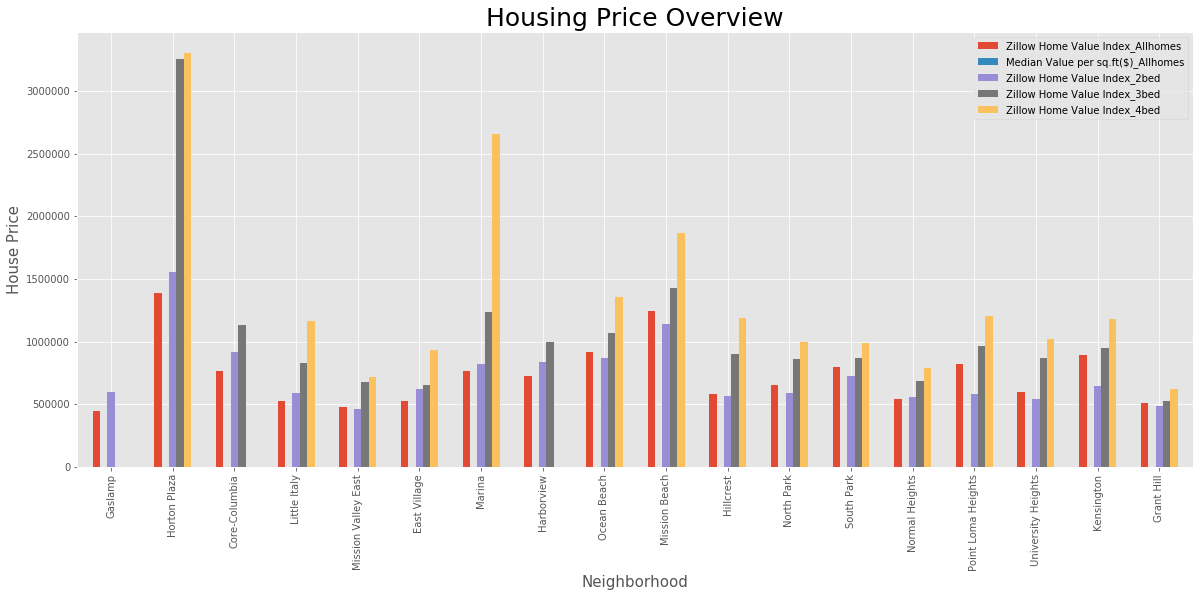

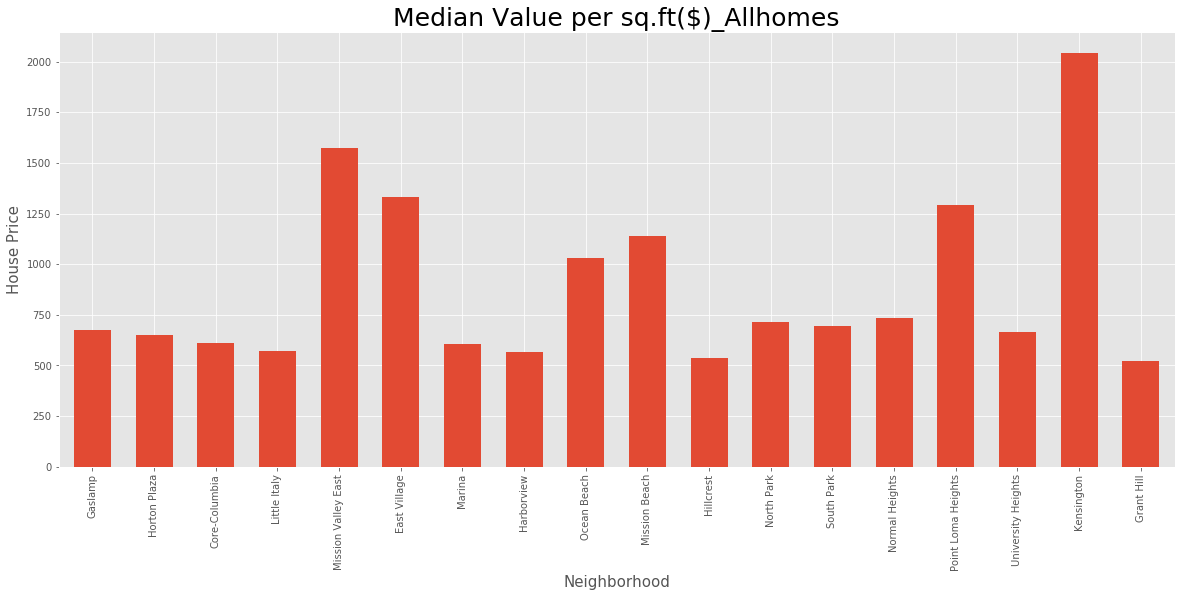

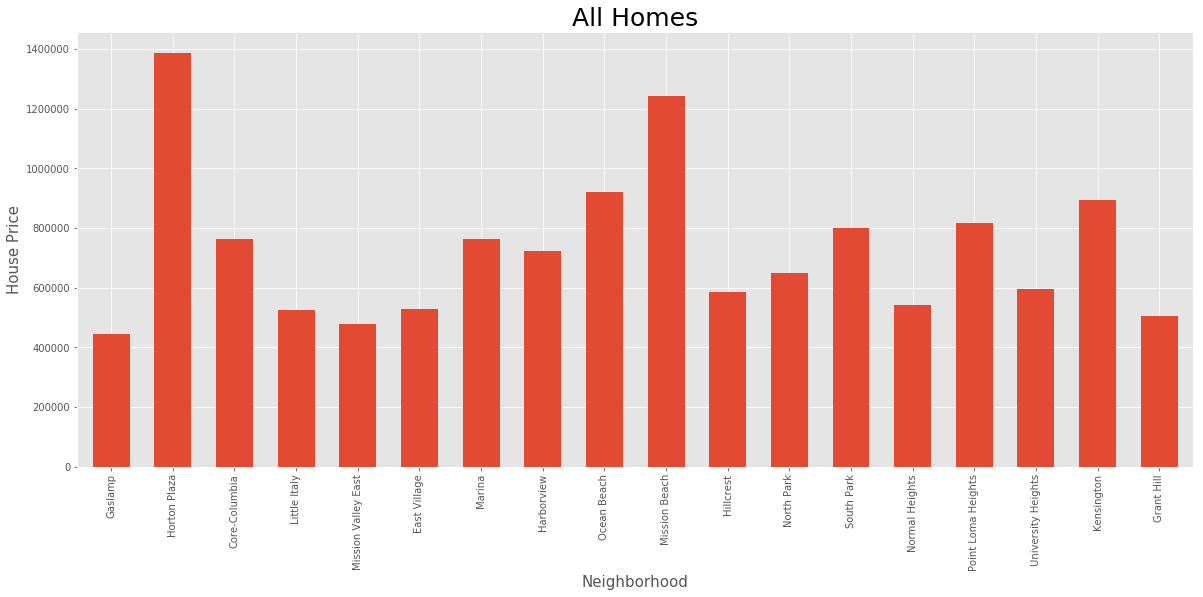

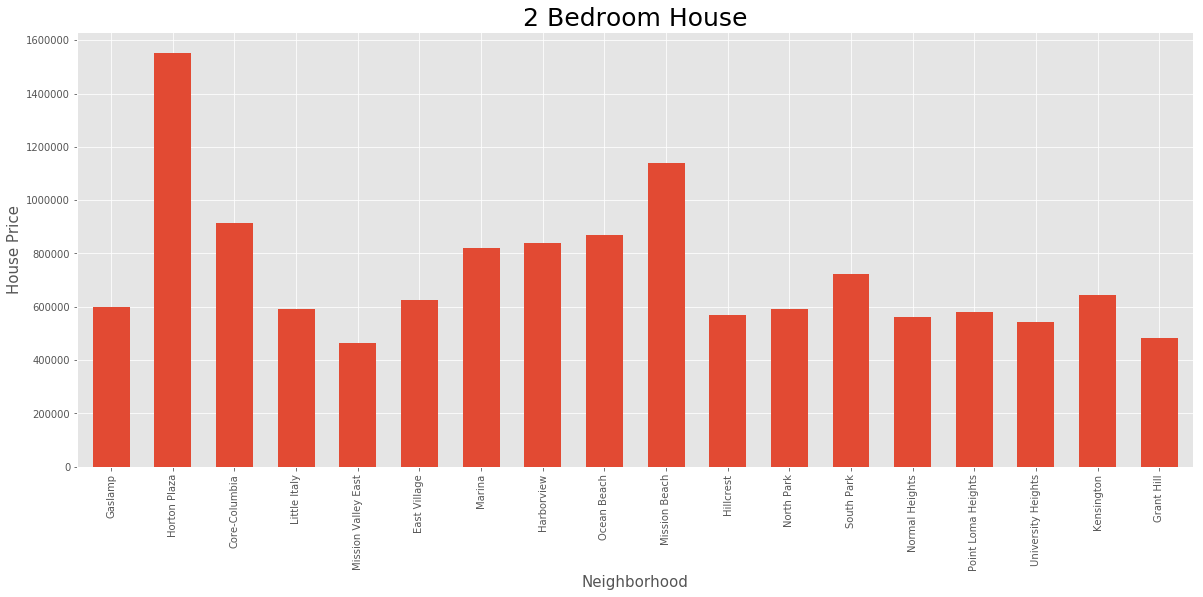

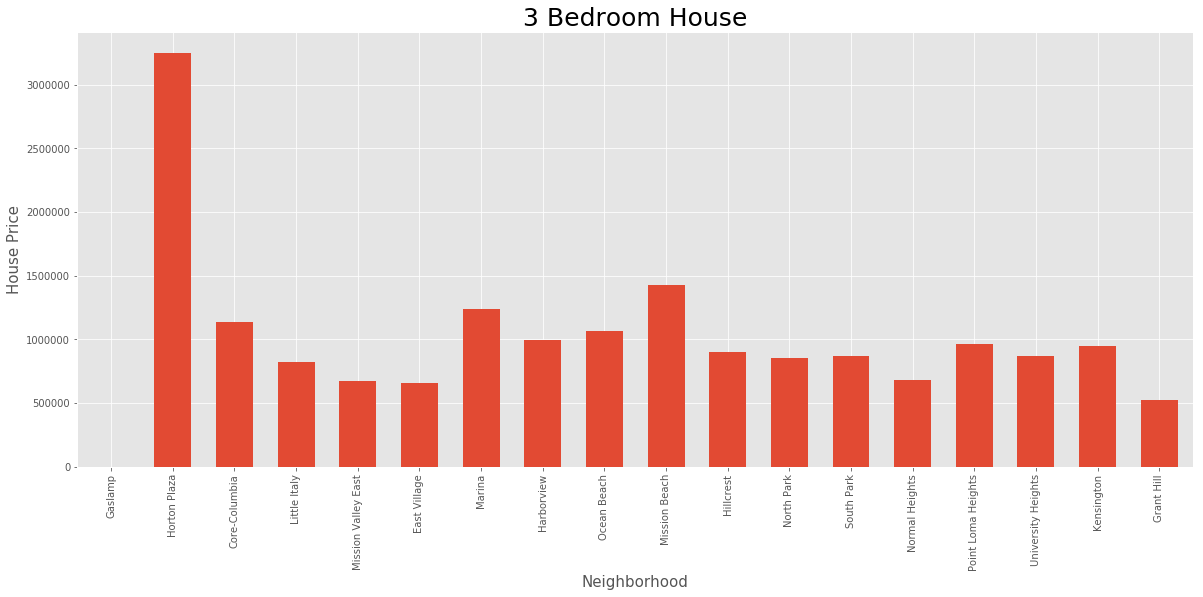

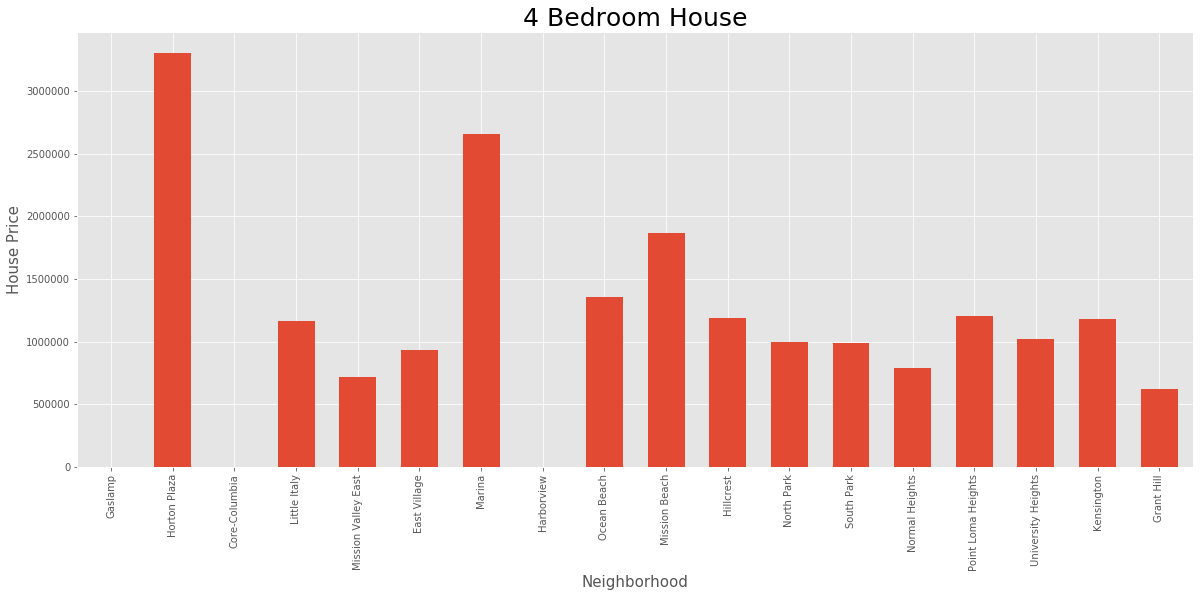

In [33]:
#drop latitude & longitude for chart data
sd_housing_charts_df = final_sd_housing.drop(columns=['Latitude','Longitude'])

#plot a whole dataframe to a bar plot - OVERVIEW
ax_sd_housing = sd_housing_charts_df.plot(kind='bar', figsize=(20,8), width=0.6)
ax_sd_housing.set_title("Housing Price Overview", fontsize=25)
#ax_sd_housing.set_facecolor('white')
#ax_sd_housing.grid(color='grey')
plt.ylabel("House Price", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.show()

print('\n')

#plot EACH CATEGORY
ax_persq = sd_housing_charts_df['Median Value per sq.ft($)_Allhomes'].plot(kind='bar', figsize=(20,8), width=0.6)
ax_persq.set_title("Median Value per sq.ft($)_Allhomes", fontsize=25)
plt.ylabel("House Price", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.show(ax_persq)

print('\n')


ax_allhomes = sd_housing_charts_df['Zillow Home Value Index_Allhomes'].plot(kind='bar', figsize=(20,8), width=0.6)
ax_allhomes.set_title("All Homes", fontsize=25)
plt.ylabel("House Price", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.show(ax_allhomes)

print('\n')

ax_2bed = sd_housing_charts_df['Zillow Home Value Index_2bed'].plot(kind='bar', figsize=(20,8), width=0.6)
ax_2bed.set_title("2 Bedroom House", fontsize=25)
plt.ylabel("House Price", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.show(ax_2bed)

print('\n')

ax_3bed = sd_housing_charts_df['Zillow Home Value Index_3bed'].plot(kind='bar', figsize=(20,8), width=0.6)
ax_3bed.set_title("3 Bedroom House", fontsize=25)
plt.ylabel("House Price", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.show(ax_3bed)

print('\n')

ax_4bed = sd_housing_charts_df['Zillow Home Value Index_4bed'].plot(kind='bar', figsize=(20,8), width=0.6)
ax_4bed.set_title("4 Bedroom House", fontsize=25)
plt.ylabel("House Price", fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.show(ax_4bed)

# Crime Rate by Neighborhood in San Diego

In [ ]:
#The data is in pdf format

!pip uninstall tabula-py --yes
!pip install camelot
import camelot
#from tabula import read_pdf
#file = "https://www.sandiego.gov/sites/default/files/201908cumneighborhood.pdf"
#tables = tabula.read.pdf_(file, pages = "all", multiple_tables = True)
#tables

Maybe included these codes::

In [ ]:
@hidden_cell
#This might go under 'analyze each neighborhood above-bold'
#top19_sd_neighborhood = ['Hillcrest', 'Gaslamp', 'Harborview', 'Little Italy', 'Core-Columbia', 
                         #'Horton Plaza', 'Pacific Beach', 'Marina', 'Ocean Beach', 'North Park',
                         #'Grantville', 'Old Town', 'Park West', 'Petco Park', 'South Park', 'East Village',
                         #'Balboa Park', 'Point Loma Heights', 'Carmel Mountain']
#neighborhood_iwant_detailed = df_iwant.loc[top19_sd_neighborhoods,:]


In [ ]:
@hidden_cell
#create a new df that includes the cluster for Manhattan
#manhattan_venues_sorted.insert(0, 'Cluster labels', Kmeans_m.labels_)
#manhattan_merged = manhattan
#manhattan_merged = manhattan_merged.join(manhattan_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#manhattan_merged.head()